# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Andra Yusaldi Putra]
- **Email:** [andrayusaldi9@gmail.com]
- **ID Dicoding:** [andra19]

## Menentukan Pertanyaan Bisnis

- Menganalisa Jumlah Pengunjung paling ramai pada bulan apa ?
- Menganalisa Jumlah Pengunjung berdasarkan musim ?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting charts
import seaborn as sns #also for visualization and plotting


## Data Wrangling

### Gathering Data

In [16]:
#menggunakan dataset day pada dataset bike sharing
bike_day= pd.read_csv('../ML-ADDP-01/Bike-sharing-dataset/day.csv', delimiter=",")


### Assessing Data

In [17]:
#mengecek tipe data dari tiap kolom
bike_day.info()#dataset day

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


semua data sesuai


In [18]:
#mengecek missing value
bike_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak ada missing value yang ditemukan

In [19]:
#mengecek apakah ada duplicate pada dataset
print("Jumlah duplikasi: ", bike_day.duplicated().sum())#dataset day

Jumlah duplikasi:  0


### Cleaning Data

Berdasarkan hasil di atas, semua tipe data sudah sesuai tidak ada yang salah


## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
#menambah label pada season
season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: ' Fall',
    4: 'Winter'
}

bike_day['season_label'] = bike_day['season'].map(season_labels)
season_labels

{1: 'Spring', 2: 'Summer', 3: ' Fall', 4: 'Winter'}

In [21]:
bike_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,Spring
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,Spring
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,Spring
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,Spring


In [22]:
#memberikan ringkasan statistik deskriptif untuk kolom-kolom numerik dalam DataFrame
bike_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,NaN
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Menganalisa Jumlah Penyewa paling ramai pada bulan apa ?

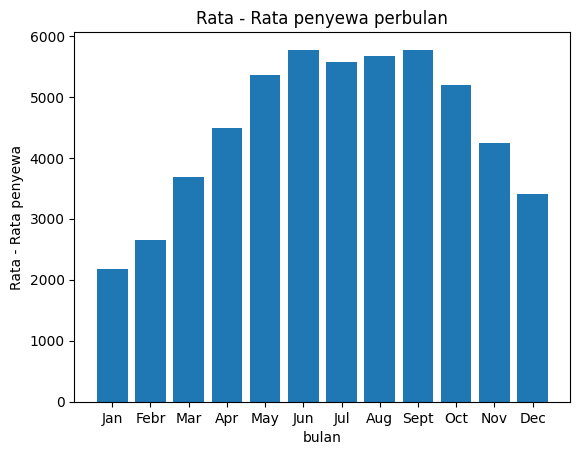

In [23]:
#penyewa berdasarkan bulan
rental_mnth= bike_day.groupby('mnth')['cnt'].mean()

plt.bar(rental_mnth.index, rental_mnth.values, color='#1f77b4')

plt.title('Rata - Rata penyewa perbulan')
plt.xlabel('bulan')
plt.ylabel('Rata - Rata penyewa')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
           ['Jan', 'Febr', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

plt.show()

Jumlah penyewa paling ramai jatuh pada bulan Juni dan september

### Pertanyaan 2:

Menganalisa Jumlah Penyewa berdasarkan musim ?

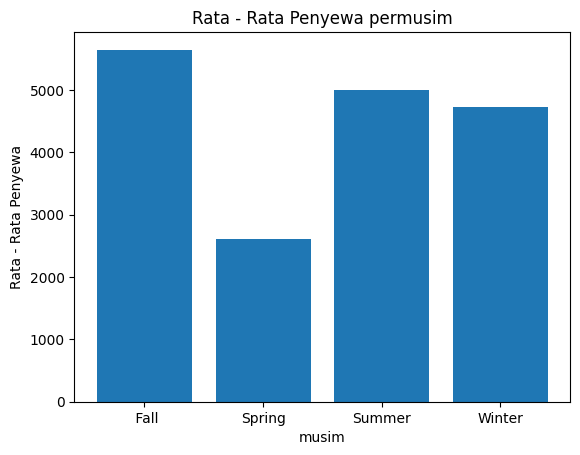

In [24]:
rental_season= bike_day.groupby('season_label')['cnt'].mean()

plt.bar(rental_season.index, rental_season.values, color='#1f77b4')

plt.title('Rata - Rata Penyewa permusim')
plt.xlabel('musim')
plt.ylabel('Rata - Rata Penyewa')

plt.show()

penyewa sepeda paling sepi jatuh kepada musim spring dan paling ramai pengunjung berapa pada musim fall

## Conclusion

- Conclution pertanyaan 1 : Jumlah pengunjung paling ramai jatuh pada bulan Juni dan september
    * Pada bulan juni dan september adalah bulan yang paling disukai penyewa sepeda
- Conclution pertanyaan 2 : pengunjung paling sepi jatuh kepada musim spring dan paling ramai pengunjung berapa pada musim fall
    * Musim gugur(fall) merupakan musim peralihan dari musim panas ke musim dingin. Musim gugur adalah saat yang tepat pula untuk berjalan-jalan melihat daun berguguran yang warnanya sangat cantik. hal ini mungkin banyaknya penyewa sepeda yang ingin berjalan-jalan
    * Pada musim semi(spring), walaupun tidak lagi sedingin musim dingin, cuaca masih cukup dingin dan juga seringkali hujan. hal ini mungkin penyebab orang masih malas keluar